# Aula 3 - Gráficos e Séries Temporais

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.precision", 2)
pd.set_option("display.float_format", lambda x: '%.2f' % x)

In [2]:
imoveis = pd.read_csv('dados/imoveis_venda_sp', sep=";")

In [3]:
imoveis

,Rua,Bairro,Metragem,Quartos,Banheiros,Vagas,Moeda,Preco,Preco_mquadrado
0,"Avenida Itacira, 255",Planalto Paulista,1000,4,8,6,R$,7000000.0,7000.000000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,496,4,4,4,R$,3700000.0,7459.677419
2,Rua Alba Valdez,Jardim Reimberg,125,4,3,2,R$,380000.0,3040.000000
3,NaN,Jardim Morumbi,310,3,2,4,R$,685000.0,2209.677419
4,"Rua Tobias Barreto, 195",Mooca,100,3,2,2,R$,540000.0,5400.000000
...,...,...,...,...,...,...,...,...,...
9151,Avenida Odila,Planalto Paulista,267,3,6,4,R$,1500000.0,5617.977528
9152,Rua Tapuçu,Vila Sofia,95,2,2,2,R$,665000.0,7000.000000
9153,Rua Guararema,Bosque da Saúde,605,8,7,5,R$,2300000.0,3801.652893
9154,Rua Estero Belaco,Vila da Saúde,205,3,3,6,R$,1050000.0,5121.951220


In [35]:
dados_bairro = imoveis.groupby(["Bairro"]).mean().reset_index()
dados_bairro

,Bairro,Metragem,Quartos,Banheiros,Vagas,Preco,Preco_mquadrado
0,Aclimação,246.16,3.27,3.04,2.91,1763200.01,7656.17
1,Alto da Boa Vista,418.88,4.12,5.12,4.62,2391250.00,5849.57
2,Alto da Lapa,299.25,3.15,3.85,4.00,2083168.75,7606.73
3,Alto da Mooca,270.05,3.30,2.60,3.65,1184170.00,5691.74
4,Alto de Pinheiros,429.85,3.94,4.83,4.95,4782698.96,11269.98
...,...,...,...,...,...,...,...
692,Vila Água Funda,152.20,2.60,2.20,2.60,652000.00,4467.13
693,Água Branca,173.58,3.08,3.25,2.25,1226500.00,7269.11
694,Água Fria,165.42,2.83,3.42,2.50,927083.33,5841.10
695,Água Funda,139.00,3.00,2.50,2.00,545000.00,3876.86


In [36]:
# 15 bairros que aparecem com maior frequência no dataframe
filtro = imoveis["Bairro"].value_counts().index[:15]
filtro

Index(['Alto de Pinheiros', 'Jardim Guedala', 'Jardim Paulista',
       'Brooklin Paulista', 'Jardim Europa', 'Pacaembu', 'Vila Madalena',
       'Cidade Jardim', 'Planalto Paulista', 'Jardim Leonor', 'Vila Mariana',
       'Santo Amaro', 'Morumbi', 'Campo Belo', 'Sumaré'],
      dtype='object')

In [39]:
dados_bairros_selecionados = dados_bairro.query("Bairro in @filtro")
dados_bairros_selecionados

,Bairro,Metragem,Quartos,Banheiros,Vagas,Preco,Preco_mquadrado
4,Alto de Pinheiros,429.85,3.94,4.83,4.95,4782698.96,11269.98
19,Brooklin Paulista,312.51,3.47,3.85,3.71,2124092.81,7264.92
25,Campo Belo,280.06,3.41,3.77,3.14,1935999.86,7176.03
57,Cidade Jardim,692.25,4.13,5.28,6.14,6095345.03,8563.84
155,Jardim Europa,566.18,3.79,4.73,5.03,11496061.43,19962.69
168,Jardim Guedala,2754.14,4.09,5.74,6.12,5102452.09,8028.00
187,Jardim Leonor,571.42,4.10,5.54,5.31,3801919.82,6563.88
227,Jardim Paulista,489.79,3.86,4.63,4.40,8030379.70,16087.45
335,Morumbi,586.93,3.95,5.00,5.92,3657336.48,6255.17
338,Pacaembu,501.43,3.87,4.45,5.14,4339782.50,8768.36


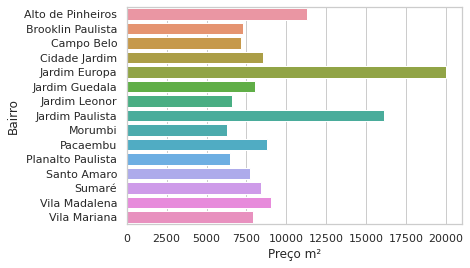

In [63]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Preco_mquadrado", y="Bairro", data=dados_bairros_selecionados)
ax.set(xlabel='Preço m²', ylabel='Bairro')
plt.show()

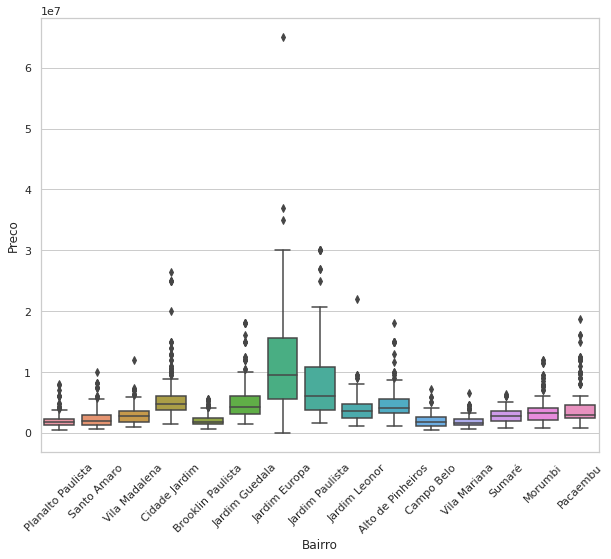

In [67]:
plt.figure(figsize=(10, 8))
bx = sns.boxplot(data=imoveis.query("Bairro in @filtro"), x="Bairro", y="Preco")
bx.tick_params(axis='x', rotation=45)
plt.show()

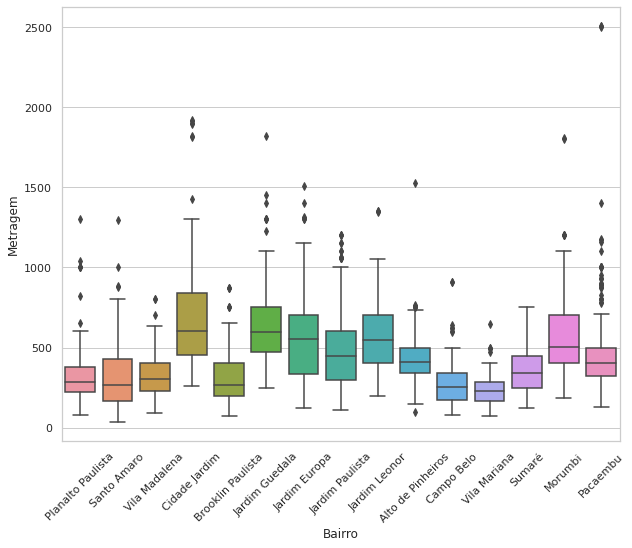

In [68]:
plt.figure(figsize=(10, 8))
bx = sns.boxplot(data=imoveis.query("Bairro in @filtro and Metragem < 30000"), x="Bairro", y="Metragem")
bx.tick_params(axis='x', rotation=45)
plt.show()